<a href="https://colab.research.google.com/github/preritt/Embed/blob/master/FeedbackReducedEpochBasedPendigitForReportAdam04302019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import tensorflow as tf

In [0]:
# Load data
train_data = np.load('X_train.npy')
train_label = np.load('y_train.npy')
validation_data = np.load('X_validation.npy')
validation_label = np.load('y_validation.npy')
test_data = np.load('X_test.npy')
test_label = np.load('y_test.npy')

In [3]:
# Visualize data
train_data_pandas = pd.DataFrame(train_data)
train_data_labels = pd.DataFrame(train_label)
train_data_pandas.head()

,0,1,2,3,4,5,6,7
0,8.949582,-4.286268,-1.618116,-5.563660,-0.528531,-2.788612,-2.153607,2.321852
1,7.895125,1.576207,-2.783810,7.369057,-0.803854,4.184283,0.250293,2.148146
2,9.116622,-5.365335,-2.624452,-4.229593,-2.036412,-2.417719,-1.506112,3.154646
3,10.294292,4.448064,1.300888,-0.489738,0.710722,-2.002546,-5.218903,-0.062628
4,10.775319,2.801049,-0.430359,-6.618764,1.370674,-0.696267,-0.438141,-1.096400


In [4]:
train_data.shape

(5995, 8)

#### Combine Validation and train data for MLP classifier - and set validation fraction to 4500/15000 = 0.3

In [0]:
train_valid_combined = np.concatenate((train_data, validation_data))
train_valid_label = np.concatenate((train_label, validation_label))


In [7]:
clf = MLPClassifier(hidden_layer_sizes=(40, 20, ), max_iter=500, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.01)


clf.fit(train_data, train_label)

Iteration 1, loss = 1.12229186
Iteration 2, loss = 0.27630817
Iteration 3, loss = 0.17940873
Iteration 4, loss = 0.14870875
Iteration 5, loss = 0.13422307
Iteration 6, loss = 0.12491732
Iteration 7, loss = 0.11561283
Iteration 8, loss = 0.10954788
Iteration 9, loss = 0.10444853
Iteration 10, loss = 0.09997343
Iteration 11, loss = 0.09542991
Iteration 12, loss = 0.09315024
Iteration 13, loss = 0.09086000
Iteration 14, loss = 0.08797955
Iteration 15, loss = 0.08514271
Iteration 16, loss = 0.08348284
Iteration 17, loss = 0.08288803
Iteration 18, loss = 0.08186669
Iteration 19, loss = 0.07878308
Iteration 20, loss = 0.07808383
Iteration 21, loss = 0.07576302
Iteration 22, loss = 0.07428644
Iteration 23, loss = 0.07352276
Iteration 24, loss = 0.07310997
Iteration 25, loss = 0.07200573
Iteration 26, loss = 0.07080075
Iteration 27, loss = 0.06966033
Iteration 28, loss = 0.06799473
Iteration 29, loss = 0.06854212
Iteration 30, loss = 0.06804438
Iteration 31, loss = 0.06642355
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 20), learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=1e-05,
       validation_fraction=0.1, verbose=10, warm_start=False)

#### Train accuracy

In [8]:
clf.score(train_data,train_label)

0.9896580483736447

In [9]:
# Validation Accuracy/
clf.score(validation_data,validation_label)

0.9839893262174784

In [10]:
# Test accuracy
clf.score(test_data,test_label)

0.9748427672955975

In [0]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc.fit(train_label.reshape(1,-1).T)
train_label_one_hot = enc.transform(train_label.reshape(-1,1))
test_label_one_hot = enc.transform(test_label.reshape(-1,1))
validation_label_one_hot = enc.transform(validation_label.reshape(-1,1))
validation_test_label_one_hot = enc.transform(train_valid_label.reshape(-1,1))

In [0]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev, seed=1000)

In [14]:
## Define weights of the layer

G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))

G_W3 =  tf.Variable(np.float32(clf.coefs_[2]))
G_b3 = tf.Variable(np.float32(clf.intercepts_ [2]))

Instructions for updating:
Colocations handled automatically by placer.


## Rerun the same thing in tensorflow

In [0]:
## Building the graph - Baseline
saver = tf.train.Saver()
learning_rate = 0.001
num_steps = 10000
batch_size = 200
train_losses = []
test_acc = []
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.matmul(layer_1, G_W2) + G_b2
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, G_W3) + G_b3
    layer_outputs.append(out_layer)
    return out_layer

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

  ### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % 1000 == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            train_losses.append(train_loss)
            validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
            if step%1000 == 0:
              print("Validation Accuracy {} ...".format(validation_accuracy))
              print()
              if (validation_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letter')
                test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_Accuracy), "%")
    print("Valid acc=",str(best_accuracy_valid), "%")

    print("="*50)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training loss= 0.0007878761, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 1000, training loss= 0.00027250333, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 2000, training loss= 0.00087376055, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 3000, training loss= 6.208709e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 4000, training loss= 3.6624704e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 5000, training loss= 0.00016827443, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 6000, training loss= 0.0021800278, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 7000, training loss= 0.00023414326, training acc= 100.0%
Validation Accuracy 99

## Divide valid in two parts for validation and validation-test

In [15]:
validation_data.shape

(1499, 8)

In [0]:
valid_validation_data = validation_data[0:1000,:]
valid_validation_data_label = validation_label_one_hot[0:1000,:]

In [0]:
valid_test_data = validation_data[1000:,:]
valid_test_data_label = validation_label_one_hot[1000:,:]

#### Define weights for modified architecture

In [0]:
## Define weights of the layer

G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))

G_W3 =  tf.Variable(np.float32(clf.coefs_[2]))
G_b3 = tf.Variable(np.float32(clf.intercepts_ [2]))

G_w_out_h1 = tf.Variable(xavier_init([10,40]))
G_b_out_h1 = tf.Variable(xavier_init([40]))

G_w_h2_h1 = tf.Variable(xavier_init([20,40]))
G_b_h2_h1 = tf.Variable(xavier_init([40]))


G_w_h1_input = tf.Variable(xavier_init([40,8]))
G_b_h1_input = tf.Variable(xavier_init([8]))


G_w_input_h1_h2 = tf.Variable(xavier_init([8,20]))
G_b_h1_input = tf.Variable(xavier_init([20]))


saver = tf.train.Saver()

In [19]:
train_data.shape

(5995, 8)

In [20]:
5995/200

29.975

In [21]:
100000/30

3333.3333333333335

In [0]:
EPOCHS = 3333

## Best Tuned, Use W1 = 3, W2 = 1, W3 = 1 from best validation accuracy found below

In [47]:
train_data.shape

(5995, 8)

In [0]:
# X_train = 

In [0]:
from sklearn.utils import shuffle  #train_data, train_label


In [49]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [104]
num_steps = 100000
batch_size = 200
BATCH_SIZE = batch_size
train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 10


###
validation_accuracy_track = []
train_accuracy_track = []
connection_probability_track = []
number_of_ex = train_data.shape[0]
total_steps_for_one_pass = number_of_ex//BATCH_SIZE + 1
epoch_track = []
###
learning_rate = 0.001

X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.matmul(layer_1, G_W2) + G_b2
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, G_W3) + G_b3
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

        layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]

wLoss1 = 3
wLoss2 = 1
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


#############
### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for i in range(EPOCHS):
      X_train, y_train = shuffle(train_data, train_label_one_hot)
      
      for step in range(0, total_steps_for_one_pass):
          if step>=number_of_ex//BATCH_SIZE:
            batch_x, batch_y = X_train[step*BATCH_SIZE:,:],y_train[step*BATCH_SIZE:]
            step = 0
          else:
            start = step*BATCH_SIZE
            finish = (step+1)*BATCH_SIZE
            batch_x, batch_y = X_train[step:finish,:],y_train[step:finish]
          sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
      if i % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: X_train,Y: y_train})
          train_accuracy.append(train_acc)
          print("Epoch " + str(i) + '/' + str(EPOCHS) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          train_losses.append(train_loss)
          validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
          val_accuracy.append(validation_accuracy)
          if step%plot_every == 0:
            print("Validation Accuracy {} ...".format(validation_accuracy))
            print()
            if (validation_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validation_accuracy
              saver.save(sess, './statlog_letter2')
              G_W1np, G_b1np, G_W2np, G_b2np, G_W3np, G_b3np = sess.run([G_W1, G_b1, G_W2, G_b2, G_W3, G_b3])
    print("Valid acc=",str(best_accuracy_valid), "%")
    ValidAccuracy_Track.append(best_accuracy_valid)
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)

    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    print("="*50)

Epoch 0/3333, training loss= 1.3385851, training acc= 93.728107213974%
Validation Accuracy 94.1294174194336 ...

Epoch 10/3333, training loss= 0.0832698, training acc= 98.51542711257935%
Validation Accuracy 97.93196105957031 ...

Epoch 20/3333, training loss= 0.05007368, training acc= 98.7322747707367%
Validation Accuracy 98.79920196533203 ...

Epoch 30/3333, training loss= 0.041123293, training acc= 98.83236289024353%
Validation Accuracy 98.46564483642578 ...

Epoch 40/3333, training loss= 0.036575433, training acc= 98.86572360992432%
Validation Accuracy 98.46564483642578 ...

Epoch 50/3333, training loss= 0.03325339, training acc= 98.98248314857483%
Validation Accuracy 98.66577911376953 ...

Epoch 60/3333, training loss= 0.03164795, training acc= 98.94912242889404%
Validation Accuracy 98.59906768798828 ...

Epoch 70/3333, training loss= 0.029906044, training acc= 98.99916648864746%
Validation Accuracy 98.59906768798828 ...

Epoch 80/3333, training loss= 0.02966851, training acc= 98.9

In [0]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from scipy.signal import savgol_filter

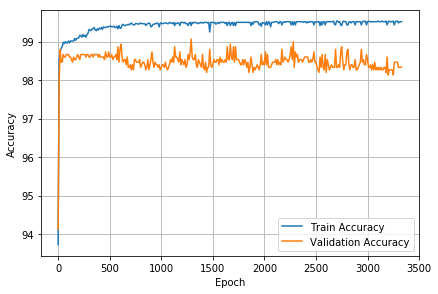

In [52]:
steps_plot =  [step for step in range(0, 3331, 10)]
plt.plot(steps_plot, 100*np.asarray(train_accuracy))
plt.plot(steps_plot, val_accuracy)

# plt.plot(steps_plot, savgol_filter(100*np.asarray(train_accuracy),11,1))  
# plt.plot(steps_plot, savgol_filter(np.asarray(val_accuracy),11,1))
plt.tight_layout()
# plt.xticks(np.arange(min(steps_plot), max(steps_plot)+1, 2000))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy','Validation Accuracy'])
plt.grid(abs)
plt.show()

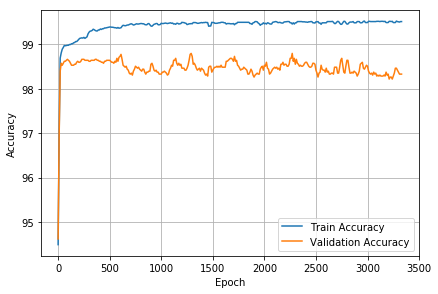

In [55]:
steps_plot =  [step for step in range(0, 3331, 10)]
# plt.plot(steps_plot, 100*np.asarray(train_accuracy))
# plt.plot(steps_plot, val_accuracy)

plt.plot(steps_plot, savgol_filter(100*np.asarray(train_accuracy),3,1))  
plt.plot(steps_plot, savgol_filter(np.asarray(val_accuracy),3,1))
plt.tight_layout()
# plt.xticks(np.arange(min(steps_plot), max(steps_plot)+1, 2000))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy','Validation Accuracy'])
plt.grid(abs)
plt.show()

In [56]:
valid_accuracy_filtered = val_accuracy#savgol_filter(np.asarray(val_accuracy),51,1)
print(max(valid_accuracy_filtered))
valid_accuracy_filtered_np = np.asarray(valid_accuracy_filtered)
print(np.argmax(valid_accuracy_filtered))
print(steps_plot[np.argmax(valid_accuracy_filtered)])

99.06604
129
1290


## Now retrain till 1290 epoch with complete data

In [57]:
print(train_label_one_hot.shape)
print(train_valid_combined.shape)

(5995, 10)
(7494, 8)


In [0]:
# keep aside 
aside_examples= 1
aside_valid_test = train_valid_combined[-aside_examples:]
aside_valid_test_label = validation_test_label_one_hot[-aside_examples:]
combined_train_valid = train_valid_combined[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = validation_test_label_one_hot[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
EPOCHS = 1290

In [61]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [104]
num_steps = 100000
batch_size = 200
BATCH_SIZE = batch_size
train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 10


###
validation_accuracy_track = []
train_accuracy_track = []
connection_probability_track = []
number_of_ex = combined_train_valid.shape[0]
total_steps_for_one_pass = number_of_ex//BATCH_SIZE + 1
epoch_track = []
###
learning_rate = 0.001

X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.matmul(layer_1, G_W2) + G_b2
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, G_W3) + G_b3
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

        layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]

wLoss1 = 3
wLoss2 = 1
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


#############
### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for i in range(EPOCHS):
      X_train, y_train = shuffle(combined_train_valid, combined_train_valid_label)
      
      for step in range(0, total_steps_for_one_pass):
          if step>=number_of_ex//BATCH_SIZE:
            batch_x, batch_y = X_train[step*BATCH_SIZE:,:],y_train[step*BATCH_SIZE:]
            step = 0
          else:
            start = step*BATCH_SIZE
            finish = (step+1)*BATCH_SIZE
            batch_x, batch_y = X_train[step:finish,:],y_train[step:finish]
          sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
      if i % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: X_train,Y: y_train})
          train_accuracy.append(train_acc)
          print("Epoch " + str(i) + '/' + str(EPOCHS) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          train_losses.append(train_loss)
          validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
          val_accuracy.append(validation_accuracy)
          if step%plot_every == 0:
            print("Validation Accuracy {} ...".format(validation_accuracy))
            print()
            if (validation_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validation_accuracy
    saver.save(sess, './PenDigitFinalReduced')
    G_W1np, G_b1np, G_W2np, G_b2np, G_W3np, G_b3np = sess.run([G_W1, G_b1, G_W2, G_b2, G_W3, G_b3])
    print("Valid acc=",str(best_accuracy_valid), "%")
    ValidAccuracy_Track.append(best_accuracy_valid)
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)

    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    print("="*50)

Epoch 0/1290, training loss= 0.74340725, training acc= 94.247967004776%
Validation Accuracy 94.9299545288086 ...

Epoch 10/1290, training loss= 0.07485091, training acc= 98.55865240097046%
Validation Accuracy 98.66577911376953 ...

Epoch 20/1290, training loss= 0.047829717, training acc= 98.75884056091309%
Validation Accuracy 98.93262481689453 ...

Epoch 30/1290, training loss= 0.03938057, training acc= 98.90564680099487%
Validation Accuracy 99.0660400390625 ...

Epoch 40/1290, training loss= 0.03586432, training acc= 98.91899228096008%
Validation Accuracy 98.73249053955078 ...

Epoch 50/1290, training loss= 0.034051318, training acc= 98.85226488113403%
Validation Accuracy 99.0660400390625 ...

Epoch 60/1290, training loss= 0.031557813, training acc= 98.86561036109924%
Validation Accuracy 98.73249053955078 ...

Epoch 70/1290, training loss= 0.030412475, training acc= 98.95902872085571%
Validation Accuracy 99.13275146484375 ...

Epoch 80/1290, training loss= 0.028961232, training acc= 9

In [63]:
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './PenDigitFinalReduced')
    train_accuracy = sess.run(accuracy*100, feed_dict={X: X_train,Y: y_train})
    print("Train acc=",str(train_accuracy), "%")
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    test_accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_accuracy), "%")

INFO:tensorflow:Restoring parameters from ./PenDigitFinalReduced
Train acc= 99.49286 %
ValidValid acc= 99.799866 %
Test acc= 97.71298 %



# Old code - Hyper Tuning below

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [104]
num_steps = 100000
batch_size = 200
train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 50

learning_rate = 0.001

X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.matmul(layer_1, G_W2) + G_b2
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, G_W3) + G_b3
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

        layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]

wLoss1 = 6
wLoss2 = 1
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % plot_every == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            train_accuracy.append(train_acc)
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            train_losses.append(train_loss)
            validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
            val_accuracy.append(validation_accuracy)
            if step%plot_every == 0:
              print("Validation Accuracy {} ...".format(validation_accuracy))
              print()
              if (validation_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letter2')
                G_W1np, G_b1np, G_W2np, G_b2np, G_W3np, G_b3np = sess.run([G_W1, G_b1, G_W2, G_b2, G_W3, G_b3])
    print("Valid acc=",str(best_accuracy_valid), "%")
    ValidAccuracy_Track.append(best_accuracy_valid)
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)

    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    print("="*50)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training loss= 109.98173, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 50, training loss= 2.9851856, training acc= 95.99999785423279%
Validation Accuracy 96.66444396972656 ...

step 100, training loss= 1.204541, training acc= 98.50000143051147%
Validation Accuracy 96.66444396972656 ...

step 150, training loss= 0.4234264, training acc= 98.00000190734863%
Validation Accuracy 97.13141632080078 ...

step 200, training loss= 0.2155815, training acc= 100.0%
Validation Accuracy 97.79853057861328 ...

step 250, training loss= 0.26538092, training acc= 98.00000190734863%
Validation Accuracy 97.99866485595703 ...

step 300, training loss= 0.089434944, training acc= 99.00000095367432%
Validation Accuracy 98.13208770751953 ...

step 350, training loss= 0.09699867, training acc= 

step 3750, training loss= 0.020443223, training acc= 99.50000047683716%
Validation Accuracy 99.39960479736328 ...

step 3800, training loss= 0.0031589298, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 3850, training loss= 0.021816887, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 3900, training loss= 0.0019288776, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 3950, training loss= 0.003070686, training acc= 100.0%
Validation Accuracy 99.3328857421875 ...

step 4000, training loss= 0.0020186144, training acc= 100.0%
Validation Accuracy 99.26617431640625 ...

step 4050, training loss= 0.003893922, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 4100, training loss= 0.003914307, training acc= 100.0%
Validation Accuracy 99.26617431640625 ...

step 4150, training loss= 0.0027375175, training acc= 100.0%
Validation Accuracy 99.3328857421875 ...

step 4200, training loss= 0.028090766, training acc= 100.0%

step 7750, training loss= 0.008926385, training acc= 100.0%
Validation Accuracy 99.3328857421875 ...

step 7800, training loss= 0.007084446, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 7850, training loss= 0.0019090291, training acc= 100.0%
Validation Accuracy 99.3328857421875 ...

step 7900, training loss= 0.0029436874, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 7950, training loss= 0.0020611836, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 8000, training loss= 0.001377817, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 8050, training loss= 0.0012259203, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 8100, training loss= 0.002394261, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 8150, training loss= 0.0019675242, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 8200, training loss= 0.0014403276, training acc= 100.0%
Validation A

step 11700, training loss= 0.0012291945, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 11750, training loss= 0.0020973568, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 11800, training loss= 0.0031509835, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 11850, training loss= 0.00077393407, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 11900, training loss= 0.001463656, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 11950, training loss= 0.0014289782, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 12000, training loss= 0.0017870718, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 12050, training loss= 0.00079788995, training acc= 100.0%
Validation Accuracy 99.3328857421875 ...

step 12100, training loss= 0.0016537891, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 12150, training loss= 0.0016806563, training acc= 100.0

Validation Accuracy 99.66644287109375 ...

step 15650, training loss= 0.0010081913, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 15700, training loss= 0.0006320703, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 15750, training loss= 0.00042395716, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 15800, training loss= 0.008197133, training acc= 99.50000047683716%
Validation Accuracy 99.66644287109375 ...

step 15850, training loss= 0.00062605215, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 15900, training loss= 0.0028816727, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 15950, training loss= 0.0004817937, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 16000, training loss= 0.000926494, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 16050, training loss= 0.0011067715, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 16

step 19550, training loss= 0.0012934528, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 19600, training loss= 0.00067132356, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 19650, training loss= 0.0006708908, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 19700, training loss= 0.00051356864, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 19750, training loss= 0.0005716739, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 19800, training loss= 0.0015756874, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 19850, training loss= 0.00044441404, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 19900, training loss= 0.00046472985, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 19950, training loss= 0.0019085231, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 20000, training loss= 0.00064424466, training 

step 23450, training loss= 0.0002452064, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 23500, training loss= 0.0004905822, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 23550, training loss= 0.0011501253, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 23600, training loss= 0.0006442656, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 23650, training loss= 0.001140686, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 23700, training loss= 0.00035088966, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 23750, training loss= 0.0001861612, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 23800, training loss= 0.00036639103, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 23850, training loss= 0.0047737495, training acc= 99.50000047683716%
Validation Accuracy 98.99933624267578 ...

step 23900, training loss= 0.0019784146, tr

step 27350, training loss= 0.00043832892, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 27400, training loss= 0.00015114578, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 27450, training loss= 0.0002530059, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 27500, training loss= 0.0005573732, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 27550, training loss= 0.002913527, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 27600, training loss= 0.00021032675, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 27650, training loss= 0.00029163313, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 27700, training loss= 0.00017352428, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 27750, training loss= 0.00036021558, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 27800, training loss= 0.0003691757, training acc= 100.

step 31300, training loss= 0.00024245618, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 31350, training loss= 0.00026811467, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 31400, training loss= 0.00027533175, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 31450, training loss= 0.00021013702, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 31500, training loss= 0.00055247394, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 31550, training loss= 9.206993e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 31600, training loss= 0.0005603596, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 31650, training loss= 6.6824265e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 31700, training loss= 0.00024058984, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 31750, training loss= 0.00030530727, training a

Validation Accuracy 99.53302001953125 ...

step 35300, training loss= 0.0001355987, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 35350, training loss= 0.00019360453, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 35400, training loss= 7.418265e-05, training acc= 100.0%
Validation Accuracy 99.3328857421875 ...

step 35450, training loss= 4.0403505e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 35500, training loss= 0.00010569965, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 35550, training loss= 0.0013812288, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 35600, training loss= 6.756264e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 35650, training loss= 0.00010093002, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 35700, training loss= 0.0002853288, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 35750, train

Validation Accuracy 99.53302001953125 ...

step 39200, training loss= 8.512596e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 39250, training loss= 3.898871e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 39300, training loss= 0.00010826381, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 39350, training loss= 0.00011156293, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 39400, training loss= 0.00017524915, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 39450, training loss= 8.207859e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 39500, training loss= 0.000100693855, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 39550, training loss= 0.00013879225, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 39600, training loss= 5.205572e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 39

Validation Accuracy 99.53302001953125 ...

step 43150, training loss= 0.00017356718, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 43200, training loss= 8.69128e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 43250, training loss= 5.999961e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 43300, training loss= 2.5281532e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 43350, training loss= 9.84981e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 43400, training loss= 3.78385e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 43450, training loss= 9.178153e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 43500, training loss= 0.0003126404, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 43550, training loss= 0.0001608723, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 43600, training loss= 0

step 47050, training loss= 3.8523525e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 47100, training loss= 6.451976e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 47150, training loss= 0.00013282984, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 47200, training loss= 4.904021e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 47250, training loss= 4.1567488e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 47300, training loss= 8.75449e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 47350, training loss= 6.389235e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 47400, training loss= 6.1479324e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 47450, training loss= 7.134329e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 47500, training loss= 6.657223e-05, training acc= 100.0

step 51000, training loss= 0.00022281412, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 51050, training loss= 0.0001668612, training acc= 100.0%
Validation Accuracy 99.19947052001953 ...

step 51100, training loss= 7.978783e-05, training acc= 100.0%
Validation Accuracy 99.19947052001953 ...

step 51150, training loss= 0.00013462124, training acc= 100.0%
Validation Accuracy 99.19947052001953 ...

step 51200, training loss= 0.00013785163, training acc= 100.0%
Validation Accuracy 99.3328857421875 ...

step 51250, training loss= 0.00018963232, training acc= 100.0%
Validation Accuracy 99.26617431640625 ...

step 51300, training loss= 6.282311e-05, training acc= 100.0%
Validation Accuracy 99.26617431640625 ...

step 51350, training loss= 0.00016580711, training acc= 100.0%
Validation Accuracy 99.26617431640625 ...

step 51400, training loss= 0.000199106, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 51450, training loss= 0.00013546049, training acc=

Validation Accuracy 99.53302001953125 ...

step 54950, training loss= 1.0240141e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 55000, training loss= 3.2522315e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 55050, training loss= 2.814707e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 55100, training loss= 3.2359338e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 55150, training loss= 2.4374725e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 55200, training loss= 7.4953605e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 55250, training loss= 5.0625113e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 55300, training loss= 1.8525583e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 55350, training loss= 9.84969e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 5540

step 58900, training loss= 4.747023e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 58950, training loss= 2.4939007e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 59000, training loss= 5.2840096e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 59050, training loss= 3.0037698e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 59100, training loss= 1.9948182e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 59150, training loss= 2.259097e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 59200, training loss= 4.832419e-06, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 59250, training loss= 3.734016e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 59300, training loss= 3.113109e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 59350, training loss= 0.00010672514, training acc= 100.0%
Validation A

Validation Accuracy 99.46630859375 ...

step 62850, training loss= 7.831659e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 62900, training loss= 3.082342e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 62950, training loss= 3.6916674e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 63000, training loss= 7.708867e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 63050, training loss= 6.067909e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 63100, training loss= 4.3358865e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 63150, training loss= 1.8145993e-05, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 63200, training loss= 0.00020959767, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 63250, training loss= 3.9048828e-05, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 63300, training loss

Validation Accuracy 99.53302001953125 ...

step 66800, training loss= 1.689697e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 66850, training loss= 1.1212075e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 66900, training loss= 1.1537765e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 66950, training loss= 1.097558e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 67000, training loss= 1.416133e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 67050, training loss= 1.10802e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 67100, training loss= 3.5572534e-06, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 67150, training loss= 8.369124e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 67200, training loss= 8.514719e-06, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 67250, training

Validation Accuracy 99.53302001953125 ...

step 70700, training loss= 3.20987e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 70750, training loss= 1.4522185e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 70800, training loss= 3.5363137e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 70850, training loss= 1.095757e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 70900, training loss= 4.695547e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 70950, training loss= 1.1859764e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 71000, training loss= 3.5710727e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 71050, training loss= 1.3941617e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 71100, training loss= 9.191594e-06, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 711

step 74600, training loss= 1.0788188e-05, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 74650, training loss= 2.5494563e-05, training acc= 100.0%
Validation Accuracy 99.733154296875 ...

step 74700, training loss= 3.4467615e-05, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 74750, training loss= 1.661714e-05, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 74800, training loss= 1.6588934e-05, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 74850, training loss= 1.3074127e-05, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 74900, training loss= 1.2981947e-05, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 74950, training loss= 4.1587296e-06, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 75000, training loss= 1.3937446e-05, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 75050, training loss= 8.22777e-06, training 

step 78550, training loss= 4.7078254e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 78600, training loss= 0.00010571879, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 78650, training loss= 0.00019085052, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 78700, training loss= 3.1185657e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 78750, training loss= 0.00014102904, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 78800, training loss= 3.5869798e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 78850, training loss= 9.851737e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 78900, training loss= 7.002343e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 78950, training loss= 7.00325e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 79000, training loss= 1.6654265e-05, training acc= 100

step 82500, training loss= 2.1532192e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 82550, training loss= 6.3065945e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 82600, training loss= 1.1721385e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 82650, training loss= 3.5781816e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 82700, training loss= 1.8107385e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 82750, training loss= 1.6301248e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 82800, training loss= 5.0687418e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 82850, training loss= 8.131596e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 82900, training loss= 4.398148e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 82950, training loss= 8.747734e-06, training acc= 10

step 86400, training loss= 1.4726265e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 86450, training loss= 3.8365168e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 86500, training loss= 0.00012279392, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 86550, training loss= 9.797768e-06, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 86600, training loss= 9.83348e-06, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 86650, training loss= 1.2758528e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 86700, training loss= 5.892818e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 86750, training loss= 9.752139e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 86800, training loss= 7.180284e-05, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 86850, training loss= 7.7322775e-06, training acc=

step 90350, training loss= 1.9566837e-06, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 90400, training loss= 2.738634e-05, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 90450, training loss= 4.398576e-06, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 90500, training loss= 5.1447737e-06, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 90550, training loss= 4.0492014e-05, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 90600, training loss= 5.208869e-06, training acc= 100.0%
Validation Accuracy 99.66644287109375 ...

step 90650, training loss= 0.00014163382, training acc= 100.0%
Validation Accuracy 99.26617431640625 ...

step 90700, training loss= 0.00021343397, training acc= 100.0%
Validation Accuracy 99.26617431640625 ...

step 90750, training loss= 5.9526747e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 90800, training loss= 9.493276e-05, training 

step 94300, training loss= 7.726373e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 94350, training loss= 4.3244377e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 94400, training loss= 5.952838e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 94450, training loss= 4.4257376e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 94500, training loss= 3.7346474e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 94550, training loss= 4.665068e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 94600, training loss= 3.6620359e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 94650, training loss= 3.988987e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 94700, training loss= 9.329384e-06, training acc= 100.0%
Validation Accuracy 99.5997314453125 ...

step 94750, training loss= 8.579253e-06, training acc= 100.0

step 98200, training loss= 0.0010265906, training acc= 100.0%
Validation Accuracy 99.3328857421875 ...

step 98250, training loss= 8.424942e-05, training acc= 100.0%
Validation Accuracy 99.53302001953125 ...

step 98300, training loss= 9.1181166e-05, training acc= 100.0%
Validation Accuracy 99.39960479736328 ...

step 98350, training loss= 0.00037295456, training acc= 100.0%
Validation Accuracy 99.26617431640625 ...

step 98400, training loss= 0.0002534828, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 98450, training loss= 0.00023180536, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 98500, training loss= 3.2789947e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 98550, training loss= 1.3103706e-05, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 98600, training loss= 0.00018722317, training acc= 100.0%
Validation Accuracy 99.46630859375 ...

step 98650, training loss= 3.2737546e-05, training acc= 100.0%
Va

In [0]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from scipy.signal import savgol_filter

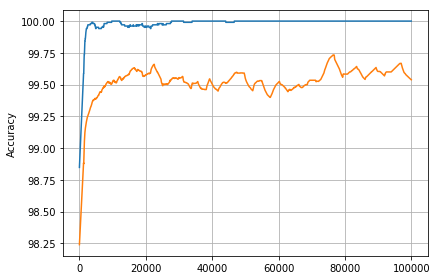

In [0]:
steps_plot =  [step for step in range(0, num_steps, plot_every)]
# plt.plot(steps_plot, 100*np.asarray(train_accuracy))
# plt.plot(steps_plot, val_accuracy)

plt.plot(steps_plot, savgol_filter(100*np.asarray(train_accuracy),51,1))  
plt.plot(steps_plot, savgol_filter(np.asarray(val_accuracy),51,1))
plt.tight_layout()
# plt.xticks(np.arange(min(steps_plot), max(steps_plot)+1, 2000))
plt.ylabel('Accuracy')
plt.grid(abs)
plt.show()

In [0]:
valid_accuracy_filtered = savgol_filter(np.asarray(val_accuracy),51,1)
print(max(valid_accuracy_filtered))
valid_accuracy_filtered_np = np.asarray(valid_accuracy_filtered)
print(np.argmax(valid_accuracy_filtered))
print(steps_plot[np.argmax(valid_accuracy_filtered)])

99.733154
1528
76400


In [0]:
print(train_label_one_hot.shape)
print(train_valid_combined.shape)

(5995, 10)
(7494, 16)


In [0]:
# keep aside 
aside_examples= 100
aside_valid_test = train_valid_combined[-aside_examples:]
aside_valid_test_label = validation_test_label_one_hot[-aside_examples:]
combined_train_valid = train_valid_combined[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = validation_test_label_one_hot[:train_valid_combined.shape[0]-aside_examples,:]

### Now retrain on this appended test data till 76400 steps

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [104]
num_steps = 76400
# num_steps = 20000

batch_size = 200
train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 50

learning_rate = 0.001


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.matmul(layer_1, G_W2) + G_b2
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, G_W3) + G_b3
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

        layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]


wLoss1 = 6
wLoss2 = 1
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % plot_every == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            
            train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
            train_accuracy.append(train_acc_total)
            train_losses.append(train_loss_total)
            print("step " + str(step) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
    
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params =  G_W1np, G_b1np, G_W2np, G_b2np, G_W3np, G_b3np
    W_track.append(this_params)
    saver.save(sess, './PendigitAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

step 0, training loss Total= 107.80377, training acc total= 99.89180564880371%
step 50, training loss Total= 2.910257, training acc total= 96.78117632865906%
step 100, training loss Total= 1.1558126, training acc total= 97.132807970047%
step 150, training loss Total= 0.555584, training acc total= 97.91722893714905%
step 200, training loss Total= 0.30808684, training acc total= 98.63402843475342%
step 250, training loss Total= 0.2063407, training acc total= 98.7422227859497%
step 300, training loss Total= 0.1639376, training acc total= 98.98566603660583%
step 350, training loss Total= 0.13866413, training acc total= 99.09386038780212%
step 400, training loss Total= 0.11609118, training acc total= 99.13443326950073%
step 450, training loss Total= 0.09607366, training acc total= 99.25615191459656%
step 500, training loss Total= 0.08615331, training acc total= 99.3102490901947%
step 550, training loss Total= 0.07135151, training acc total= 99.3914008140564%
step 600, training loss Total= 0

step 5000, training loss Total= 0.010798812, training acc total= 99.93237853050232%
step 5050, training loss Total= 0.008557538, training acc total= 99.91885423660278%
step 5100, training loss Total= 0.004709977, training acc total= 99.94590282440186%
step 5150, training loss Total= 0.0059341067, training acc total= 99.94590282440186%
step 5200, training loss Total= 0.0064507676, training acc total= 99.94590282440186%
step 5250, training loss Total= 0.0079489015, training acc total= 99.94590282440186%
step 5300, training loss Total= 0.0053567104, training acc total= 99.94590282440186%
step 5350, training loss Total= 0.012472905, training acc total= 99.94590282440186%
step 5400, training loss Total= 0.0067291465, training acc total= 99.95942711830139%
step 5450, training loss Total= 0.0063821133, training acc total= 99.95942711830139%
step 5500, training loss Total= 0.004915611, training acc total= 99.94590282440186%
step 5550, training loss Total= 0.005586457, training acc total= 99.94

step 9900, training loss Total= 0.002392349, training acc total= 99.97295141220093%
step 9950, training loss Total= 0.002543044, training acc total= 99.97295141220093%
step 10000, training loss Total= 0.0027021526, training acc total= 99.97295141220093%
step 10050, training loss Total= 0.002133778, training acc total= 99.97295141220093%
step 10100, training loss Total= 0.004848987, training acc total= 99.93237853050232%
step 10150, training loss Total= 0.048872016, training acc total= 99.93237853050232%
step 10200, training loss Total= 0.100582495, training acc total= 99.83770847320557%
step 10250, training loss Total= 0.018141244, training acc total= 99.91885423660278%
step 10300, training loss Total= 0.013173669, training acc total= 99.94590282440186%
step 10350, training loss Total= 0.005432794, training acc total= 99.97295141220093%
step 10400, training loss Total= 0.0030482505, training acc total= 99.97295141220093%
step 10450, training loss Total= 0.0031061373, training acc total

step 14750, training loss Total= 0.0023606194, training acc total= 99.97295141220093%
step 14800, training loss Total= 0.0018212249, training acc total= 99.97295141220093%
step 14850, training loss Total= 0.0017793439, training acc total= 99.97295141220093%
step 14900, training loss Total= 0.0017433839, training acc total= 99.97295141220093%
step 14950, training loss Total= 0.0017050392, training acc total= 99.97295141220093%
step 15000, training loss Total= 0.0016876386, training acc total= 99.97295141220093%
step 15050, training loss Total= 0.0017083763, training acc total= 99.97295141220093%
step 15100, training loss Total= 0.0016536368, training acc total= 99.97295141220093%
step 15150, training loss Total= 0.0016647776, training acc total= 99.97295141220093%
step 15200, training loss Total= 0.0017717731, training acc total= 99.97295141220093%
step 15250, training loss Total= 0.0021667883, training acc total= 99.97295141220093%
step 15300, training loss Total= 0.0018837727, trainin

step 19600, training loss Total= 0.0013714691, training acc total= 99.97295141220093%
step 19650, training loss Total= 0.0012160199, training acc total= 99.97295141220093%
step 19700, training loss Total= 0.0011839863, training acc total= 99.97295141220093%
step 19750, training loss Total= 0.0011023436, training acc total= 99.97295141220093%
step 19800, training loss Total= 0.0013094689, training acc total= 99.97295141220093%
step 19850, training loss Total= 0.0012858493, training acc total= 99.98647570610046%
step 19900, training loss Total= 0.0010423483, training acc total= 99.97295141220093%
step 19950, training loss Total= 0.0010284631, training acc total= 99.97295141220093%
step 20000, training loss Total= 0.0009940936, training acc total= 99.97295141220093%
step 20050, training loss Total= 0.0009777604, training acc total= 99.97295141220093%
step 20100, training loss Total= 0.0010370784, training acc total= 99.98647570610046%
step 20150, training loss Total= 0.0009623518, trainin

step 24500, training loss Total= 0.0006851655, training acc total= 100.0%
step 24550, training loss Total= 0.00068303995, training acc total= 100.0%
step 24600, training loss Total= 0.00072441663, training acc total= 99.98647570610046%
step 24650, training loss Total= 0.00076361286, training acc total= 99.97295141220093%
step 24700, training loss Total= 0.0009521131, training acc total= 100.0%
step 24750, training loss Total= 0.0006948452, training acc total= 99.98647570610046%
step 24800, training loss Total= 0.0006406626, training acc total= 99.98647570610046%
step 24850, training loss Total= 0.00072394183, training acc total= 99.98647570610046%
step 24900, training loss Total= 0.0006800402, training acc total= 99.98647570610046%
step 24950, training loss Total= 0.00076173124, training acc total= 99.98647570610046%
step 25000, training loss Total= 0.00084828644, training acc total= 99.98647570610046%
step 25050, training loss Total= 0.0013045105, training acc total= 99.98647570610046

step 29400, training loss Total= 0.001038721, training acc total= 99.97295141220093%
step 29450, training loss Total= 0.0008732299, training acc total= 100.0%
step 29500, training loss Total= 0.0007785296, training acc total= 100.0%
step 29550, training loss Total= 0.0007388578, training acc total= 99.98647570610046%
step 29600, training loss Total= 0.00071566773, training acc total= 99.98647570610046%
step 29650, training loss Total= 0.0006710088, training acc total= 99.98647570610046%
step 29700, training loss Total= 0.00065883616, training acc total= 100.0%
step 29750, training loss Total= 0.0006667866, training acc total= 100.0%
step 29800, training loss Total= 0.0006712597, training acc total= 100.0%
step 29850, training loss Total= 0.00059048715, training acc total= 100.0%
step 29900, training loss Total= 0.00060406345, training acc total= 100.0%
step 29950, training loss Total= 0.00055701175, training acc total= 100.0%
step 30000, training loss Total= 0.00054156623, training acc

step 34550, training loss Total= 0.00044587321, training acc total= 100.0%
step 34600, training loss Total= 0.0004609167, training acc total= 99.97295141220093%
step 34650, training loss Total= 0.00048981584, training acc total= 99.97295141220093%
step 34700, training loss Total= 0.00043408686, training acc total= 99.98647570610046%
step 34750, training loss Total= 0.00048327862, training acc total= 99.97295141220093%
step 34800, training loss Total= 0.0003621421, training acc total= 100.0%
step 34850, training loss Total= 0.00036967345, training acc total= 100.0%
step 34900, training loss Total= 0.00033684485, training acc total= 100.0%
step 34950, training loss Total= 0.00031488892, training acc total= 100.0%
step 35000, training loss Total= 0.00035603577, training acc total= 99.98647570610046%
step 35050, training loss Total= 0.0003075614, training acc total= 100.0%
step 35100, training loss Total= 0.0002967632, training acc total= 100.0%
step 35150, training loss Total= 0.000289008

step 39750, training loss Total= 0.00020892119, training acc total= 100.0%
step 39800, training loss Total= 0.00020740021, training acc total= 100.0%
step 39850, training loss Total= 0.00020044796, training acc total= 100.0%
step 39900, training loss Total= 0.00020117236, training acc total= 100.0%
step 39950, training loss Total= 0.00020662982, training acc total= 100.0%
step 40000, training loss Total= 0.00022174868, training acc total= 100.0%
step 40050, training loss Total= 0.00022389105, training acc total= 100.0%
step 40100, training loss Total= 0.00018409666, training acc total= 100.0%
step 40150, training loss Total= 0.00018192152, training acc total= 100.0%
step 40200, training loss Total= 0.00017530947, training acc total= 100.0%
step 40250, training loss Total= 0.00017529089, training acc total= 100.0%
step 40300, training loss Total= 0.00017908044, training acc total= 100.0%
step 40350, training loss Total= 0.00016592113, training acc total= 100.0%
step 40400, training loss

step 45250, training loss Total= 9.690328e-05, training acc total= 100.0%
step 45300, training loss Total= 9.2336144e-05, training acc total= 100.0%
step 45350, training loss Total= 9.602592e-05, training acc total= 100.0%
step 45400, training loss Total= 0.00010487824, training acc total= 100.0%
step 45450, training loss Total= 0.00010220647, training acc total= 100.0%
step 45500, training loss Total= 9.5626034e-05, training acc total= 100.0%
step 45550, training loss Total= 0.00011331605, training acc total= 100.0%
step 45600, training loss Total= 8.575009e-05, training acc total= 100.0%
step 45650, training loss Total= 8.509231e-05, training acc total= 100.0%
step 45700, training loss Total= 8.212646e-05, training acc total= 100.0%
step 45750, training loss Total= 9.5733034e-05, training acc total= 100.0%
step 45800, training loss Total= 0.00011283034, training acc total= 100.0%
step 45850, training loss Total= 0.00018208145, training acc total= 100.0%
step 45900, training loss Tota

step 50650, training loss Total= 0.00015835249, training acc total= 100.0%
step 50700, training loss Total= 0.00014916174, training acc total= 100.0%
step 50750, training loss Total= 0.00014019664, training acc total= 100.0%
step 50800, training loss Total= 0.00014101976, training acc total= 100.0%
step 50850, training loss Total= 0.00013153105, training acc total= 100.0%
step 50900, training loss Total= 0.00012707274, training acc total= 100.0%
step 50950, training loss Total= 0.0001230074, training acc total= 100.0%
step 51000, training loss Total= 0.00011899862, training acc total= 100.0%
step 51050, training loss Total= 0.000118262804, training acc total= 100.0%
step 51100, training loss Total= 0.000114020346, training acc total= 100.0%
step 51150, training loss Total= 0.000109570035, training acc total= 100.0%
step 51200, training loss Total= 0.000105423576, training acc total= 100.0%
step 51250, training loss Total= 0.0001028803, training acc total= 100.0%
step 51300, training lo

step 56150, training loss Total= 7.4100346e-05, training acc total= 100.0%
step 56200, training loss Total= 7.180451e-05, training acc total= 100.0%
step 56250, training loss Total= 7.224029e-05, training acc total= 100.0%
step 56300, training loss Total= 6.93041e-05, training acc total= 100.0%
step 56350, training loss Total= 6.7512745e-05, training acc total= 100.0%
step 56400, training loss Total= 6.749332e-05, training acc total= 100.0%
step 56450, training loss Total= 6.474875e-05, training acc total= 100.0%
step 56500, training loss Total= 6.861071e-05, training acc total= 100.0%
step 56550, training loss Total= 6.483749e-05, training acc total= 100.0%
step 56600, training loss Total= 6.269029e-05, training acc total= 100.0%
step 56650, training loss Total= 6.198897e-05, training acc total= 100.0%
step 56700, training loss Total= 5.9720052e-05, training acc total= 100.0%
step 56750, training loss Total= 6.165661e-05, training acc total= 100.0%
step 56800, training loss Total= 6.5

step 61600, training loss Total= 4.388349e-05, training acc total= 100.0%
step 61650, training loss Total= 3.934982e-05, training acc total= 100.0%
step 61700, training loss Total= 3.9151335e-05, training acc total= 100.0%
step 61750, training loss Total= 3.762736e-05, training acc total= 100.0%
step 61800, training loss Total= 3.8864946e-05, training acc total= 100.0%
step 61850, training loss Total= 3.6440688e-05, training acc total= 100.0%
step 61900, training loss Total= 3.549115e-05, training acc total= 100.0%
step 61950, training loss Total= 3.541477e-05, training acc total= 100.0%
step 62000, training loss Total= 3.3963213e-05, training acc total= 100.0%
step 62050, training loss Total= 3.3782417e-05, training acc total= 100.0%
step 62100, training loss Total= 3.4798944e-05, training acc total= 100.0%
step 62150, training loss Total= 3.2889755e-05, training acc total= 100.0%
step 62200, training loss Total= 3.3676384e-05, training acc total= 100.0%
step 62250, training loss Tota

step 67150, training loss Total= 3.0018924e-05, training acc total= 100.0%
step 67200, training loss Total= 2.9021878e-05, training acc total= 100.0%
step 67250, training loss Total= 2.846245e-05, training acc total= 100.0%
step 67300, training loss Total= 2.7864291e-05, training acc total= 100.0%
step 67350, training loss Total= 2.8762997e-05, training acc total= 100.0%
step 67400, training loss Total= 2.6894899e-05, training acc total= 100.0%
step 67450, training loss Total= 2.8075181e-05, training acc total= 100.0%
step 67500, training loss Total= 2.7499987e-05, training acc total= 100.0%
step 67550, training loss Total= 2.6125514e-05, training acc total= 100.0%
step 67600, training loss Total= 2.681083e-05, training acc total= 100.0%
step 67650, training loss Total= 2.4851539e-05, training acc total= 100.0%
step 67700, training loss Total= 2.6955682e-05, training acc total= 100.0%
step 67750, training loss Total= 2.4541901e-05, training acc total= 100.0%
step 67800, training loss T

step 72650, training loss Total= 1.8741659e-05, training acc total= 100.0%
step 72700, training loss Total= 1.8067454e-05, training acc total= 100.0%
step 72750, training loss Total= 1.9611332e-05, training acc total= 100.0%
step 72800, training loss Total= 1.7597018e-05, training acc total= 100.0%
step 72850, training loss Total= 1.6553427e-05, training acc total= 100.0%
step 72900, training loss Total= 1.8374385e-05, training acc total= 100.0%
step 72950, training loss Total= 2.0708258e-05, training acc total= 100.0%
step 73000, training loss Total= 3.0586092e-05, training acc total= 100.0%
step 73050, training loss Total= 1.5540822e-05, training acc total= 100.0%
step 73100, training loss Total= 1.6361264e-05, training acc total= 100.0%
step 73150, training loss Total= 2.6443455e-05, training acc total= 100.0%
step 73200, training loss Total= 2.0350955e-05, training acc total= 100.0%
step 73250, training loss Total= 8.135466e-05, training acc total= 100.0%
step 73300, training loss 

In [0]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    test_accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_accuracy), "%")

INFO:tensorflow:Restoring parameters from .\PendigitAdam
ValidValid acc= 100.0 %
Test acc= 98.19897 %


## Hyperparameter tuning by splitting valid into two sets

In [0]:
## Building the graph
# saver = tf.train.Saver()
hid_neuron = [90]
num_steps = 50000
batch_size = 200
train_losses = []
test_acc = []
for h in hid_neuron:
    num_hidden_neurons=h
    learning_rate = 0.001


    X = tf.placeholder("float", [None, train_data.shape[1]])
    Y = tf.placeholder("float", [None, 1+np.max(train_label)])
    weights = {
        'h1': tf.Variable(np.float32(clf.coefs_[0])),
        'out': tf.Variable(np.float32(clf.coefs_[1]))
    }
    biases = {
        'b1': tf.Variable(np.float32(clf.intercepts_ [0])),
        'out': tf.Variable(np.float32(clf.intercepts_ [1]))
    }
    saver = tf.train.Saver()
    W_track = []
    ValidAccuracy_Track = []
    ValidAccuracy_Test_track = []
    def neural_net(x,train = True):
        layer_outputs = []
        layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3
        layer_outputs.append(out_layer)
        for loop in range(0,2):        
            layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
            layer1_feedback1 = tf.nn.relu(layer1_feedback1)
            layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
            layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
            
            layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
            layer_1 = tf.nn.relu(layer_1)
            layer_2 = tf.matmul(layer_1, G_W2) + G_b2
            layer_2 = tf.nn.relu(layer_2)
            out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
      
            layer_outputs.append(out_layer)
        if train == True:
            return layer_outputs
        else:
            return layer_outputs[0]
    for wL1 in range(1,8):
      for WL2 in range(1,wL1+1):
        for WL3 in range(0,2):
        
            wLoss1 = wL1
            wLoss2 = WL2
            wLoss3 = WL3
            loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
            loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
            loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

            loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)
            optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

            train_op = optimizer.minimize(loss)
            correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

            ### Initialization and running the model
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                best_accuracy_valid = 0
                for step in range(0, num_steps):
                    batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
                    sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
                    if step % 1000 == 0:
                        train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                        print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
                        train_losses.append(train_loss)
                        validation_accuracy = sess.run(accuracy*100, feed_dict={X: valid_validation_data,Y:valid_validation_data_label})
                        if step%1000 == 0:
                          print("Validation Accuracy valid {} ...".format(validation_accuracy))
                          print()
                          if (validation_accuracy >= best_accuracy_valid):
                            best_accuracy_valid = validation_accuracy
                            saver.save(sess, './statlog_letter')
                            G_W1np, G_b1np, G_W2np, G_b2np, G_W3np, G_b3np = sess.run([G_W1, G_b1, G_W2, G_b2, G_W3, G_b3])
                print("Valid acc=",str(best_accuracy_valid), "%")
                ValidAccuracy_Track.append(best_accuracy_valid)
                this_params = G_W1np, G_b1np, G_W2np, G_b2np, G_W3np, G_b3np
                W_track.append(this_params)
                # code for checking accuracy of valid_test
                validation_test_accuracy = sess.run(accuracy*100, feed_dict={X: valid_test_data,Y:valid_test_data_label})
                ValidAccuracy_Test_track.append(validation_test_accuracy)
                print("Validation Accuracy Test {} ...".format(validation_test_accuracy))
                print("="*50)
                print("W1 = {} ...".format(wLoss1))
                print("W2 = {} ...".format(wLoss2))
                print("W3 = {} ...".format(wLoss3))

                print("*"*50)
                print("="*50)

step 0, training loss= 20.2434, training acc= 100.0%
Validation Accuracy valid 99.5 ...

step 1000, training loss= 0.0024754491, training acc= 100.0%
Validation Accuracy valid 99.19999694824219 ...

step 2000, training loss= 0.0041238433, training acc= 99.50000047683716%
Validation Accuracy valid 99.29999542236328 ...

step 3000, training loss= 0.003001457, training acc= 100.0%
Validation Accuracy valid 99.4000015258789 ...

step 4000, training loss= 0.0017010515, training acc= 100.0%
Validation Accuracy valid 99.29999542236328 ...

step 5000, training loss= 0.002645749, training acc= 100.0%
Validation Accuracy valid 99.29999542236328 ...

step 6000, training loss= 0.00051691965, training acc= 100.0%
Validation Accuracy valid 99.19999694824219 ...

step 7000, training loss= 0.00043812944, training acc= 100.0%
Validation Accuracy valid 99.29999542236328 ...

step 8000, training loss= 0.00096127915, training acc= 100.0%
Validation Accuracy valid 99.29999542236328 ...

step 9000, training

In [0]:
# ValidAccuracy_Track

#### Valid acc= 99.8 %
#### Validation Accuracy Test 99.79959869384766 ...
==================================================
W1 = 6 ...
W2 = 1 ...
W3 = 1 ...
#### Both are highest for this choice. 2nd (orange is used to brake tie)

In [0]:
import matplotlib.pyplot as plt

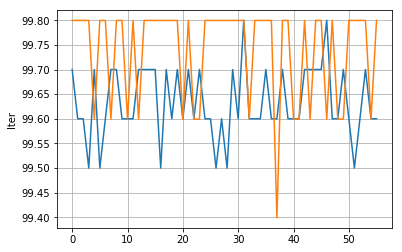

In [0]:
plt.plot(ValidAccuracy_Track)
plt.plot(ValidAccuracy_Test_track)

plt.ylabel('Iter')
plt.grid(abs)
plt.show()

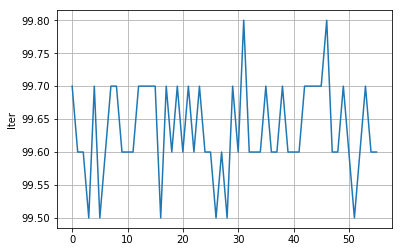

In [0]:
plt.plot(ValidAccuracy_Track)
plt.ylabel('Iter')
plt.grid(abs)
plt.show()

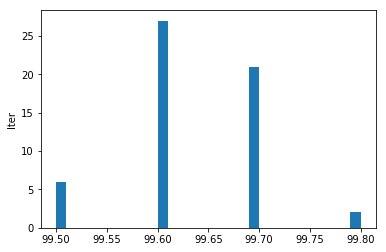

In [0]:
plt.hist([ValidAccuracy_Track],bins=30)
plt.ylabel('Iter')
plt.show()

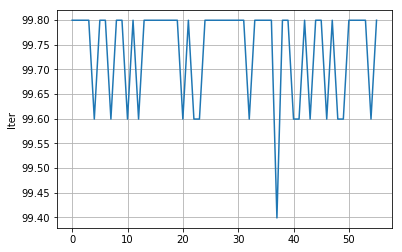

In [0]:
plt.plot(ValidAccuracy_Test_track)
plt.ylabel('Iter')
plt.grid(abs)
plt.show()

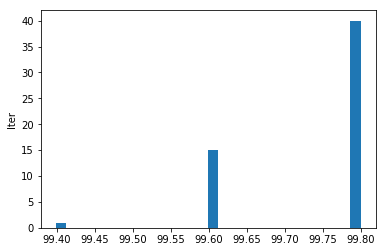

In [0]:
plt.hist([ValidAccuracy_Test_track],bins=30)
plt.ylabel('Iter')
plt.show()

## Tune Performance